# ¿Qué es PCA? 
Cuando se tiene un conjunto de datos, surge lo que se llama "la maldición de la dimensionalidad", por cada variable que agrego, aumentará exponencialmente la cantidad de datos requeridos para trabajar con ellos y obtener un resultado estadísticamente significativo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# definimos una semilla para mantener los mismos numeros aleatorios
np.random.seed(42)

In [3]:
x = 3*np.random.rand(200)
y = 20*x + 2*np.random.rand(200)

x = x.reshape(200,1)
y = y.reshape(200,1)

print(x)
print(y)

[[1.12362036]
 [2.85214292]
 [2.19598183]
 [1.79597545]
 [0.46805592]
 [0.46798356]
 [0.17425084]
 [2.59852844]
 [1.80334504]
 [2.12421773]
 [0.06175348]
 [2.90972956]
 [2.49732792]
 [0.63701733]
 [0.5454749 ]
 [0.55021353]
 [0.91272673]
 [1.57426929]
 [1.29583506]
 [0.87368742]
 [1.83555868]
 [0.41848158]
 [0.87643395]
 [1.09908553]
 [1.36820995]
 [2.35552788]
 [0.59902135]
 [1.54270332]
 [1.77724371]
 [0.13935124]
 [1.82263456]
 [0.51157237]
 [0.19515478]
 [2.84665661]
 [2.8968961 ]
 [2.42519204]
 [0.91384131]
 [0.29301634]
 [2.05269908]
 [1.32045748]
 [0.3661147 ]
 [1.48553073]
 [0.10316556]
 [2.72796121]
 [0.77633994]
 [1.98756685]
 [0.93513323]
 [1.56020406]
 [1.64013084]
 [0.55456337]
 [2.90875388]
 [2.32539847]
 [2.81849682]
 [2.68448205]
 [1.79369994]
 [2.76562271]
 [0.26547751]
 [0.58794859]
 [0.13568187]
 [0.97599099]
 [1.16603187]
 [0.8140471 ]
 [2.48621253]
 [1.07025998]
 [0.84280353]
 [1.62808825]
 [0.42277267]
 [2.40659094]
 [0.22365193]
 [2.96066081]
 [2.31673431]
 [0.59

In [4]:
# agrupamos los vectores
xy = np.hstack([x,y])
print(xy.shape)

(200, 2)


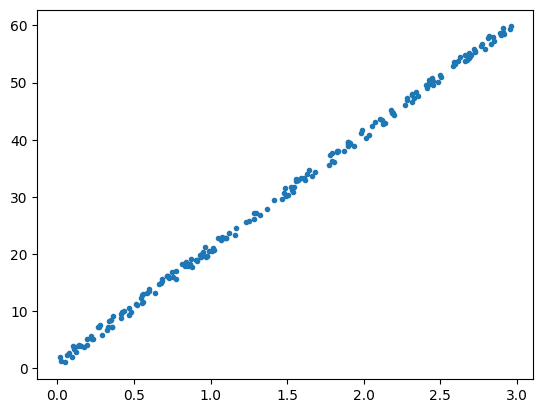

In [6]:
plt.plot(xy[:,0], xy[:,1], '.')
plt.show()

Podemos girar nuestro sistema de referencia, para que los nuevos ejes estén sobre la linea de tendencia que siguen los puntos. De esta forma, si realizamos proyecciones de los puntos sobre esa linea de tendencia obtendremos la mayor varianza de los puntos y por ende, mayor información.

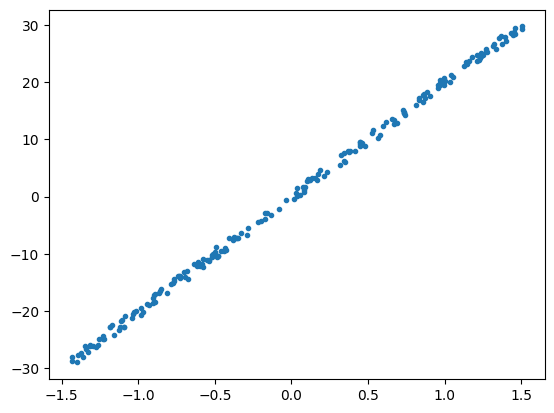

In [7]:
# centramos la informacion para simplificar el computo
xy_centrado = xy -np.mean(xy,axis = 0)

# nuestros puntos estan centrados alrededor del 0
# tanto en el eje x como en y
plt.plot(xy_centrado[:,0], xy_centrado[:,1], '.')
plt.show()

Para calcular las componentes principales (las direcciones de mayor varianza), necesitamos buscar un $d$ tal que:
$$max_{d} \; Tr(d^{T} \cdot X^{T} \cdot X \cdot d)$$
Y que además:
$$ dd^{T} = 1$$

In [9]:
# el vector asociado al autovalor mas grande nos dice 
# la direccion de maxima varianza

autovalores, autovectores = np.linalg.eig(xy_centrado.T.dot(xy_centrado))
autovectores

array([[-0.99875285, -0.04992746],
       [ 0.04992746, -0.99875285]])

In [14]:
#el segundo autovalor es el mas grande
autovalores

array([1.70408413e-01, 6.24117888e+04])

In [10]:
%run './funciones_aux/graficarvector.ipynb'

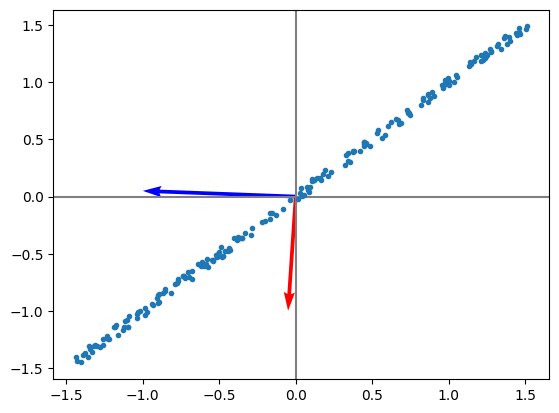

In [13]:
# como el segundo autovalor es el mas grande 
# entonces el segundo autovector (rojo) es el de mayor
# varianza
graficarvector(autovectores.T, ['blue','red'])
plt.plot(xy_centrado[:,0], xy_centrado[:,1]/20, '.')
plt.show()

In [15]:
# transformamos nuestros puntos al nuevo sistema de referencia
# esto se hace al multiplicar la matriz de autovectores
# con los puntos
xy_nuevo = autovectores.T.dot(xy_centrado.T)


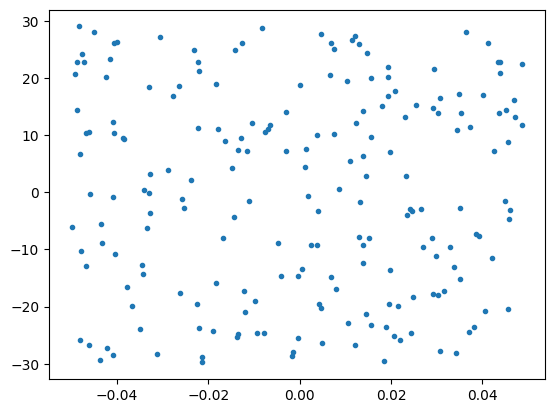

In [17]:
plt.plot(xy_nuevo[0, :],xy_nuevo[1, :], '.' )
plt.show()

Nuestros puntos en el espacio de los autovectores, aparecen dispersos ya que como mencionamos, son los vectores que maximizan la varianza de los puntos. Con esto, solo nos queda escoger un eje para proyectar los puntos y perder la menor cantidad de información posible.

### Ejemplo aplicado a imagenes

Utilizaremos un dataset "fetch_olivetti_faces", que contiene 10 tomas de 40 personas con distintas expresiones, almacenadas en arreglos dentro de la paquetería sklearn.

In [31]:
import pandas as pd
import sklearn.datasets
data= sklearn.datasets.fetch_olivetti_faces()


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/charly/scikit_learn_data


In [41]:
# guardamos una imagen en un amatriz
im = data.data[3]*255
im = im.astype(np.uint8)
im = im.reshape(64, 64)
im

array([[ 50,  49,  49, ..., 148, 130, 116],
       [ 55,  55,  54, ..., 144, 130, 114],
       [ 61,  61,  61, ..., 150, 127, 118],
       ...,
       [ 34,  35,  41, ..., 193, 194, 187],
       [ 37,  37,  37, ..., 193, 192, 189],
       [ 37,  37,  37, ..., 191, 191, 188]], dtype=uint8)

In [42]:
# valores maximos y minimos de la matriz
print('Max original', end = ' ')
print(np.amax(im))
print('Min original', end = ' ')
print(np.amin(im))

Max original 212
Min original 10


In [46]:
im_normalizado =  data.data[3]
im_normalizado = im_normalizado.reshape(64, 64)
im_normalizado

array([[0.1983471 , 0.19421488, 0.19421488, ..., 0.58264464, 0.5123967 ,
        0.45867768],
       [0.21900827, 0.21900827, 0.21487603, ..., 0.5661157 , 0.5123967 ,
        0.45041323],
       [0.23966943, 0.23966943, 0.23966943, ..., 0.59090906, 0.5       ,
        0.46280992],
       ...,
       [0.13636364, 0.14049587, 0.16115703, ..., 0.76033056, 0.7644628 ,
        0.7355372 ],
       [0.14876033, 0.14876033, 0.14876033, ..., 0.76033056, 0.75619835,
        0.74380165],
       [0.14876033, 0.14876033, 0.14876033, ..., 0.75206614, 0.75206614,
        0.73966944]], dtype=float32)

In [47]:
# valores maximos y minimos de la matriz nromailizada
print('Max original', end = ' ')
print(np.amax(im_normalizado))
print('Min original', end = ' ')
print(np.amin(im_normalizado))

Max original 0.8347107
Min original 0.041322313


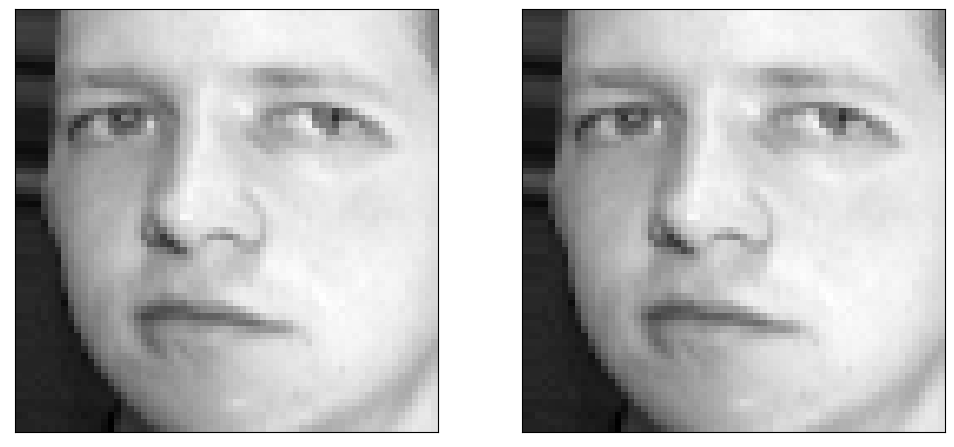

In [48]:
# graficamos la matriz normalizada y la normal
fig, ax = plt.subplots(1,2, figsize = (12,12),
                      subplot_kw = {'xticks' : [], 'yticks' : []})

ax[0].imshow(im_normalizado, cmap = 'gray')

ax[1].imshow(im, cmap = 'gray')
plt.show()


Como vimos en el anterior notebook, al normalizarla no hay cambios en la imagen. 

A continuación, vamos a cargar todo el dataset en un dataframe

In [58]:
# las imagenes estan en la seccion data.data
# vemos entonces que hay 400 imagenes en vectores de 4096 entradas
# que son 64x64 reacomodados
data.data.shape

(400, 4096)

In [72]:
# deshabilitamos el futurewarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [77]:
# creamos un Df vacio donde guardar la info
caras = pd.DataFrame([])

# guardamos solo la cara de los primeros 5 sujetos (primeras 50 imagenes)
for i in range(50):
    cara = pd.Series(data.data[i], name = f'sujeto {i}')
    caras =  caras.append(cara)

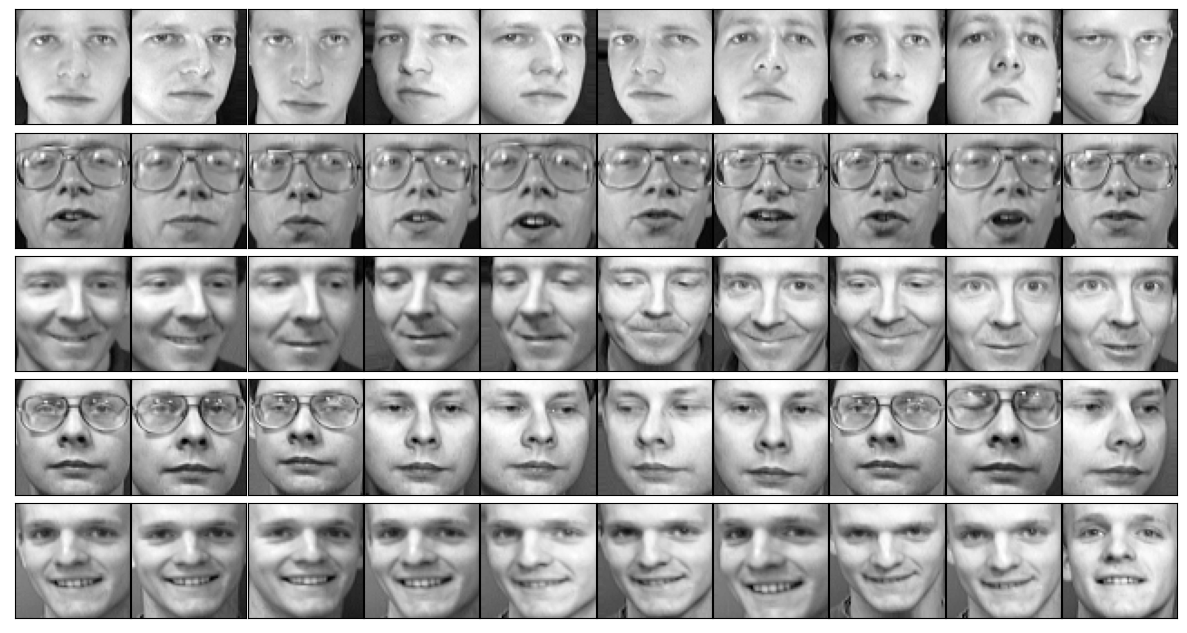

In [78]:
fig, axes = plt.subplots(5,10, figsize = (15,8),
                         subplot_kw = {'xticks' : [], 'yticks' : []},
                         gridspec_kw = dict(hspace = 0.01, wspace = 0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(caras.iloc[i].values.reshape(64,64), cmap = 'gray')


Ahora vamos a reducir las dimensiones de este conjunto

In [79]:
from sklearn.decomposition import PCA

In [80]:
# queremos quedarnos con el 50% de la variacion de los datos
caras_pca = PCA(n_components=.5)

# entrenamos el modelo
caras_pca.fit(caras)

PCA(n_components=0.5)

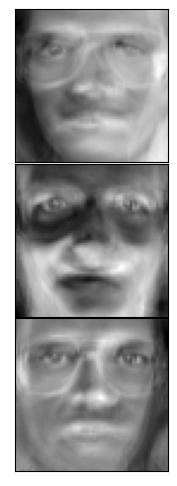

In [84]:
filas = 3
columnas = caras_pca.n_components_ // filas

fig, axes = plt.subplots(filas,columnas, figsize = (12,6),
                         subplot_kw = {'xticks' : [], 'yticks' : []},
                         gridspec_kw = dict(hspace = 0.01, wspace = 0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(caras_pca.components_[i].reshape(64,64), cmap = 'gray')


In [85]:
# cantidad de componentes que esta utilizando el algoritmo
# para obtener 50% de la información; es decir, solo bastó 
# 3 imagenes para guardar el 50%
caras_pca.n_components_

3

In [86]:
# para visualizar como lucen las imagenes con el 50%
componentes = caras_pca.transform(caras)
proyeccion = caras_pca.inverse_transform(componentes)

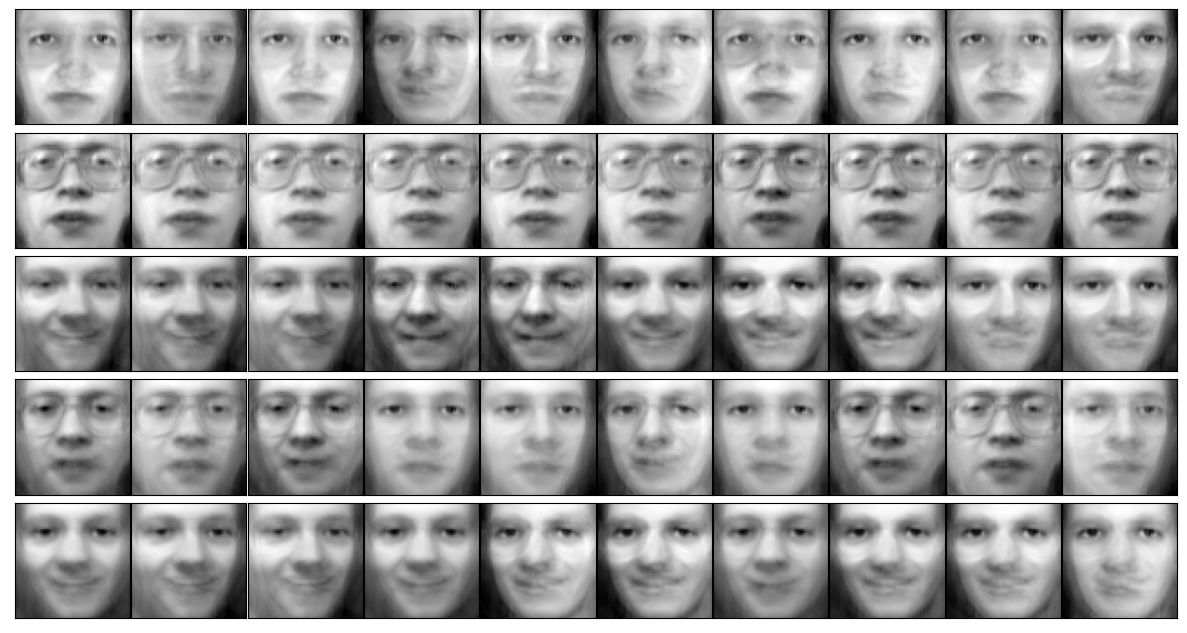

In [88]:
fig, axes = plt.subplots(5,10, figsize = (15,8),
                         subplot_kw = {'xticks' : [], 'yticks' : []},
                         gridspec_kw = dict(hspace = 0.01, wspace = 0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(proyeccion[i].reshape(64,64), cmap = 'gray')